# Setup

In [122]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:2000px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

# Prevent long logging lines from wrapping
# display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))
np.set_printoptions(linewidth=np.inf)

exp_list = []

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run experiments

### Boston to Adult

In [123]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
    'EXPERIMENT_NAME': 'boston_to_adult_svm_6',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_33',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
        'NR_Z0',
        'NR_Z1',
        'TPR_Z0',
        'TPR_Z1',
        'TNR_Z0',
        'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 50_000,
    'MIN_FREQ_FILL_PCT': .3,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 3,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
        'HardtDemParNoisy',
        'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
#         'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 10
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .000001
base_exp_info['IGNORE_RESULTS_EPSILON'] = .006
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__WA',
#     'Adult',
#     'COMPAS',
    'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__TX',
    'Adult',
#     'Boston',
#     'COMPAS',
]

exp_dict = {}
exp_dict["base_exp_info"] = base_exp_info
exp_dict["source_states"] = source_states
exp_dict["target_states"] = target_states
exp_list.append(exp_dict)

### Adult to Boston

In [124]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_44',
    'EXPERIMENT_NAME': 'adult_to_boston_error_inc_stop_59',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
#         'NR_Z0',
#         'NR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 100_000,
    'MIN_FREQ_FILL_PCT': .3,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
#         'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
        'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 1
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .005
base_exp_info['IGNORE_RESULTS_EPSILON'] = np.inf
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__WA',
    'Adult',
#     'COMPAS',
#     'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__TX',
#     'Adult',
    'Boston',
#     'COMPAS',
]

exp_dict = {}
exp_dict["base_exp_info"] = base_exp_info
exp_dict["source_states"] = source_states
exp_dict["target_states"] = target_states
exp_list.append(exp_dict)

### ACSIncome: State to State MA to MS

In [125]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_33',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
#     'EXPERIMENT_NAME': 'ACSIncome_CA_to_WY_jan8_44',
    'EXPERIMENT_NAME': 'ACSIncome_MA_to_MS_jan8_44',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
        'NR_Z0',
        'NR_Z1',
        'TPR_Z0',
        'TPR_Z1',
        'TNR_Z0',
        'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 40_000,
    'MIN_FREQ_FILL_PCT': .35,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
#         'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 1
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .025
base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MA',
#     'Adult',
#     'COMPAS',
#     'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MS',
#     'Adult',
#     'Boston',
#     'COMPAS',
]

exp_dict = {}
exp_dict["base_exp_info"] = base_exp_info
exp_dict["source_states"] = source_states
exp_dict["target_states"] = target_states
exp_list.append(exp_dict)

### ACSIncome: State to State MS to MA

In [126]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_33',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
#     'EXPERIMENT_NAME': 'ACSIncome_CA_to_WY_jan8_44',
    'EXPERIMENT_NAME': 'ACSIncome_MS_to_MA_jan8_44',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
        'NR_Z0',
        'NR_Z1',
        'TPR_Z0',
        'TPR_Z1',
        'TNR_Z0',
        'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 40_000,
    'MIN_FREQ_FILL_PCT': .35,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
#         'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 10
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .015
base_exp_info['IGNORE_RESULTS_EPSILON'] = .04
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MS',
#     'Adult',
#     'COMPAS',
#     'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MA',
#     'Adult',
#     'Boston',
#     'COMPAS',
]

exp_dict = {}
exp_dict["base_exp_info"] = base_exp_info
exp_dict["source_states"] = source_states
exp_dict["target_states"] = target_states
exp_list.append(exp_dict)

### Set Experts & Run

In [127]:
expert_algos = [
    'OptAcc',
    'HardtDemPar',
    'HardtEqOpp',
    'HardtTNRPar',
    'HardtFPRPar',
    'HardtFNRPar',
    'HardtEqOdds',
    # 'BoundedGroupLoss',
    # 'COMPAS',
]
        
experiments = []
for expert_algo in expert_algos:
    for source_dataset in source_states:
        for target_dataset in target_states:
            experiments.append({
                'EXPERT_ALGO': expert_algo,
                'IRL_METHOD': 'FairIRL',
                'DATASET': source_dataset,
                'TARGET_DATASET': target_dataset,
            })

In [128]:
# experiments = [
#     {
#         'EXPERT_ALGO': 'OptAcc',
#         'IRL_METHOD': 'FairIRL',
#     },
#     {
#         'EXPERT_ALGO': 'HardtDemPar',
#         'IRL_METHOD': 'FairIRL',
#     },
#     {
#         'EXPERT_ALGO': 'HardtEqOpp',
#         'IRL_METHOD': 'FairIRL',
#     },
# #     {
# #         'EXPERT_ALGO': 'COMPAS',
# #         'IRL_METHOD': 'FairIRL',
# #         'USE_HIDDEN_FEATURES_SOURCE': True,
# #         'USE_HIDDEN_FEATURES_TARGET': False,
# #         'EXPERT_CANNOT_PREDICT_IN_TARGET': True,
# #     },
    
    
# #     {
# #         'EXPERT_ALGO': 'OptAcc',
# #         'IRL_METHOD': 'FairIRLFO',
# #     },
# #     {
# #         'EXPERT_ALGO': 'HardtDemPar',
# #         'IRL_METHOD': 'FairIRLFO',
# #     },
# #     {
# #         'EXPERT_ALGO': 'HardtEqOpp',
# #         'IRL_METHOD': 'FairIRLFO',
# #     },
# ]

In [129]:
# for exp_i, experiment in enumerate(experiments):
#     logging.info('\n\n')
#     logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
#     exp_info = dict(base_exp_info)
    
#     for k in experiment:
#         exp_info[k] = experiment[k]
        
#     run_experiment(exp_info)

In [130]:
ALL_FEAT_PERF_OBJECTIVE_NAMES = [
    'Acc',
    'AccPar',
    'DemPar',
    'EqOpp',
    'FPRPar',
    'TNRPar',
    'FNRPar',
    'PR_Z0',
    'PR_Z1',
    'NR_Z0',
    'NR_Z1',
    'TPR_Z0',
    'TPR_Z1',
    'TNR_Z0',
    'TNR_Z1',
    'FPR_Z0',
    'FPR_Z1',
    'FNR_Z0',
    'FNR_Z1',
    'PredPar',
    'NegPredPar',
]

INFO:root:EXPERIMENT 1/7
INFO:root:For dataset: ACSIncome__MS and expert algo: OptAcc:
INFO:root:Feature expectations with no bias: [[0.6854042  0.98264398 0.52026743 0.52388457 0.62558794 0.62558794 0.52388457 0.18653321 0.66626578 0.81346679 0.33373422 0.33201581 0.80813124 0.89020153 0.51578947 0.10979847 0.48421053 0.10979847 0.48421053 0.93292536 0.96043392]]
INFO:root:Feature expectations with redlining: [[0.69013497 0.99297897 0.5496303  0.56289879 0.65644424 0.65644424 0.56289879 0.21849126 0.66886096 0.78150874 0.33113904 0.37598945 0.81309065 0.86581921 0.52226345 0.13418079 0.47773655 0.13418079 0.47773655 0.90718759 0.95671231]]


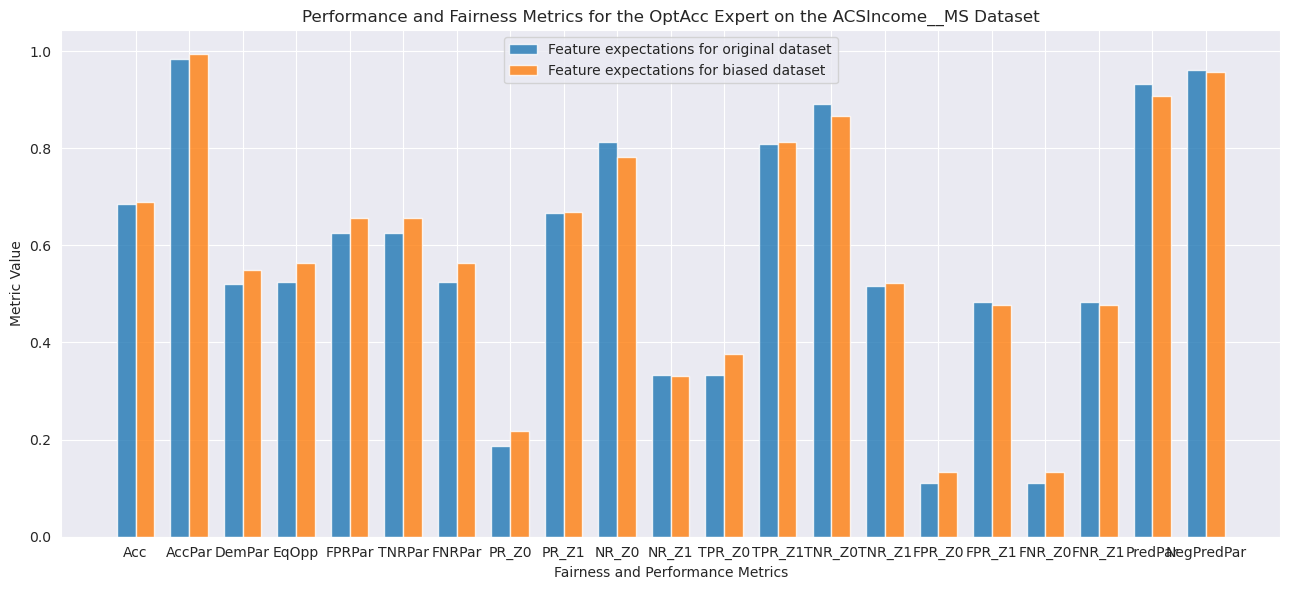

INFO:root:EXPERIMENT 2/7
INFO:root:For dataset: ACSIncome__MS and expert algo: HardtDemPar:
INFO:root:Feature expectations with no bias: [[0.62045929 0.78669806 0.99767084 0.90559114 0.84406471 0.84406471 0.90559114 0.69230769 0.69463685 0.30769231 0.30536315 0.73799726 0.83240612 0.33143264 0.48736794 0.66856736 0.51263206 0.66856736 0.51263206 0.68244736 0.97878005]]
INFO:root:Feature expectations with redlining: [[0.64050104 0.91409565 0.34368008 0.45338026 0.32928615 0.32928615 0.45338026 0.21924883 0.87556874 0.78075117 0.12443126 0.38513514 0.93175487 0.86906475 0.19835089 0.13093525 0.80164911 0.13093525 0.80164911 0.99433076 0.9619962 ]]


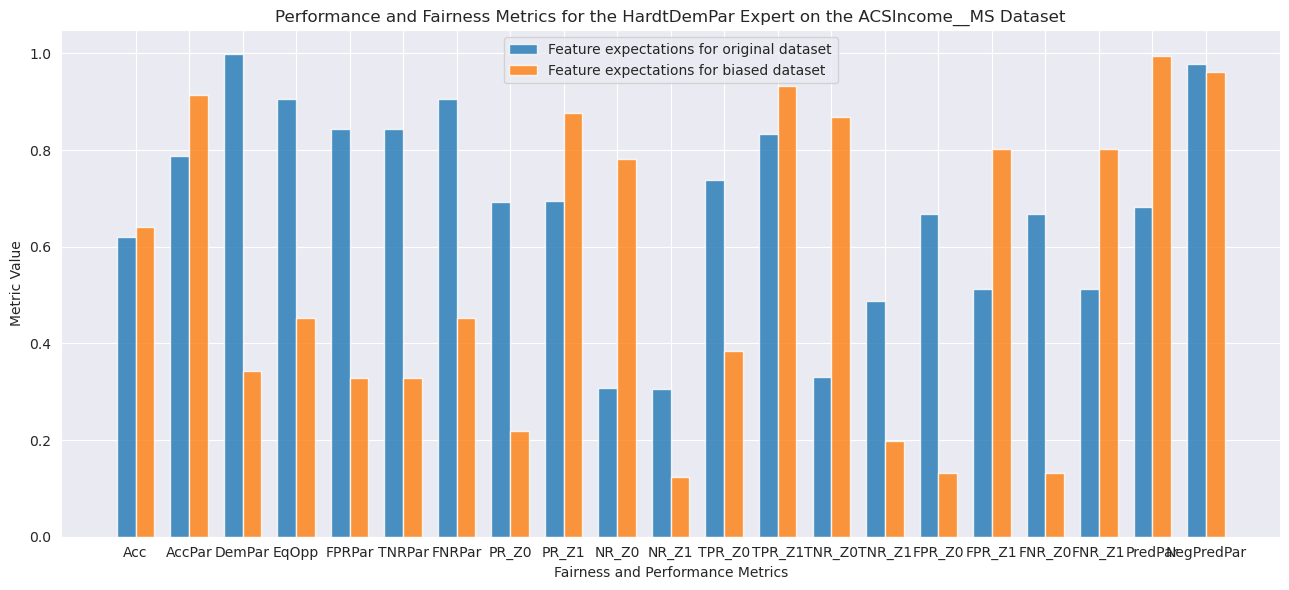

INFO:root:EXPERIMENT 3/7
INFO:root:For dataset: ACSIncome__MS and expert algo: HardtEqOpp:
INFO:root:Feature expectations with no bias: [[0.62205164 0.79801221 0.91600444 0.98786435 0.76705138 0.76705138 0.98786435 0.73178808 0.64779252 0.26821192 0.35220748 0.80243572 0.79030007 0.30618182 0.53913043 0.69381818 0.46086957 0.69381818 0.46086957 0.6910854  0.91966535]]
INFO:root:Feature expectations with redlining: [[0.64410328 0.8903288  0.30227499 0.43149232 0.27872174 0.27872174 0.43149232 0.19928025 0.89700526 0.80071975 0.10299474 0.37771739 0.94622507 0.88903833 0.16776007 0.11096167 0.83223993 0.11096167 0.83223993 0.97182887 0.96064325]]


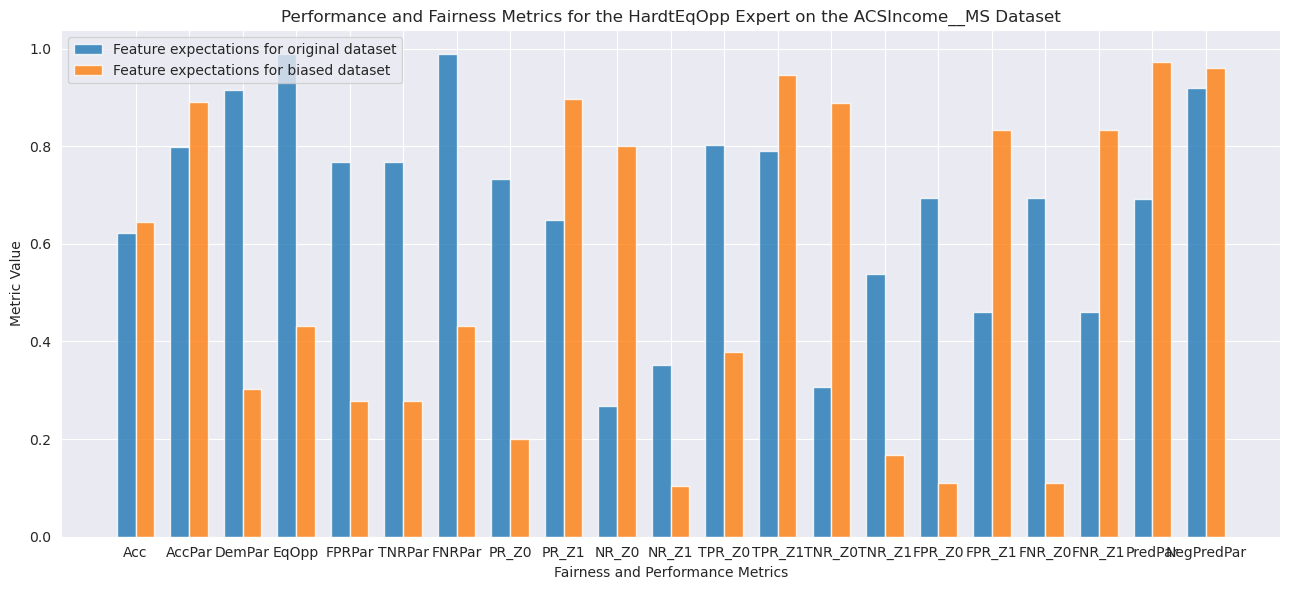

INFO:root:EXPERIMENT 4/7
INFO:root:For dataset: ACSIncome__MS and expert algo: HardtTNRPar:
INFO:root:Feature expectations with no bias: [[0.64827391 0.88240569 0.89624978 0.86789481 0.98044478 0.98044478 0.86789481 0.55613701 0.65988723 0.44386299 0.34011277 0.67066667 0.80277186 0.50739645 0.52695167 0.49260355 0.47304833 0.49260355 0.47304833 0.74093228 0.9361406 ]]
INFO:root:Feature expectations with redlining: [[0.6754386  0.94462214 0.47380557 0.57745492 0.50300915 0.50300915 0.57745492 0.26939351 0.79558794 0.73060649 0.20441206 0.47592847 0.89847355 0.83785714 0.34086629 0.16214286 0.65913371 0.16214286 0.65913371 0.95998292 0.96200543]]


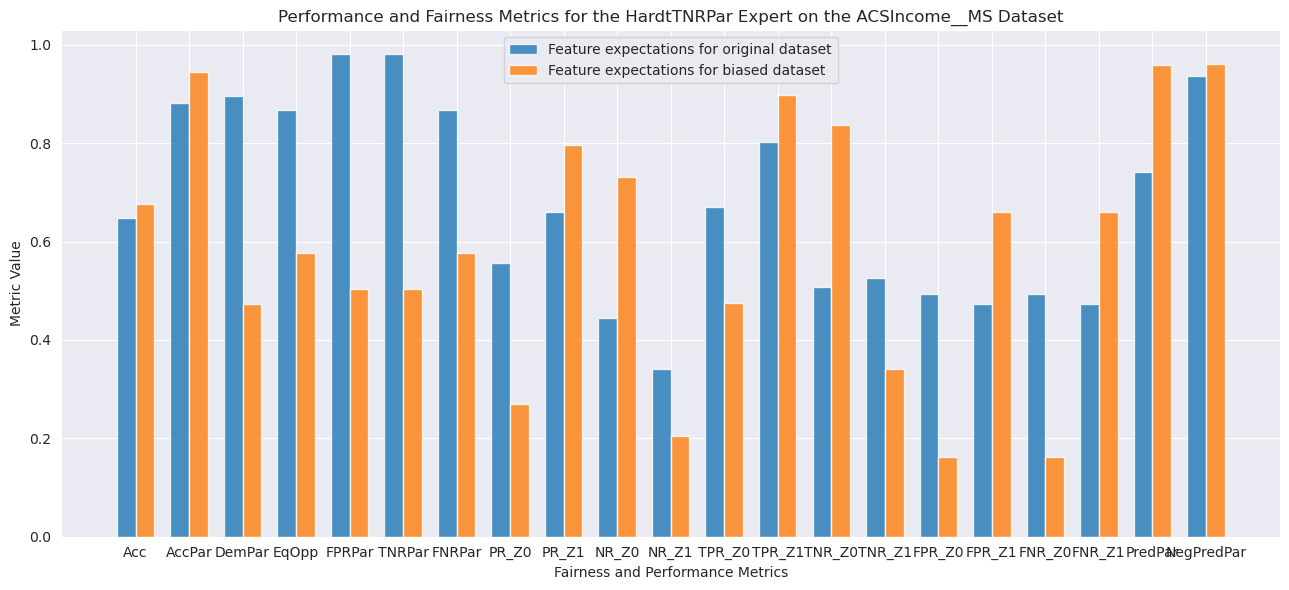

INFO:root:EXPERIMENT 5/7
INFO:root:For dataset: ACSIncome__MS and expert algo: HardtFPRPar:
INFO:root:Feature expectations with no bias: [[0.66114898 0.88135765 0.84177166 0.80641314 0.982234   0.982234   0.80641314 0.50686228 0.66509062 0.49313772 0.33490938 0.62125341 0.81484026 0.55402466 0.53625866 0.44597534 0.46374134 0.44597534 0.46374134 0.72316367 0.9497358 ]]
INFO:root:Feature expectations with redlining: [[0.65266379 0.94943876 0.41089368 0.47345166 0.44163943 0.44163943 0.47345166 0.20646067 0.79556699 0.79353933 0.20443301 0.35177866 0.878327   0.87363834 0.31527778 0.12636166 0.68472222 0.12636166 0.68472222 0.97335262 0.9495104 ]]


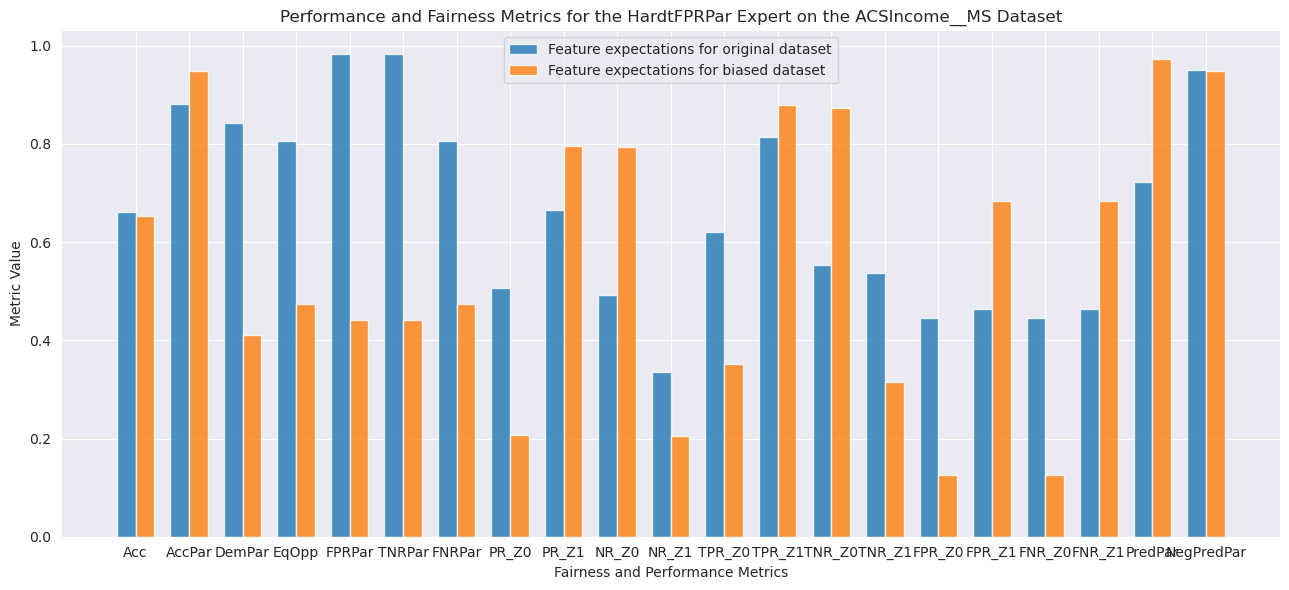

INFO:root:EXPERIMENT 6/7
INFO:root:For dataset: ACSIncome__MS and expert algo: HardtFNRPar:
INFO:root:Feature expectations with no bias: [[0.61329734 0.78602496 0.92814511 0.99213363 0.77993761 0.77993761 0.99213363 0.74701671 0.67516181 0.25298329 0.32483819 0.80136986 0.80923623 0.28205128 0.50211367 0.71794872 0.49788633 0.71794872 0.49788633 0.69135734 0.9392138 ]]
INFO:root:Feature expectations with redlining: [[0.6279301  0.91482496 0.38135456 0.49723156 0.35010727 0.35010727 0.49723156 0.25457103 0.87321647 0.74542897 0.12678353 0.42030848 0.92307692 0.84059041 0.19069767 0.15940959 0.80930233 0.15940959 0.80930233 0.99162759 0.94281179]]


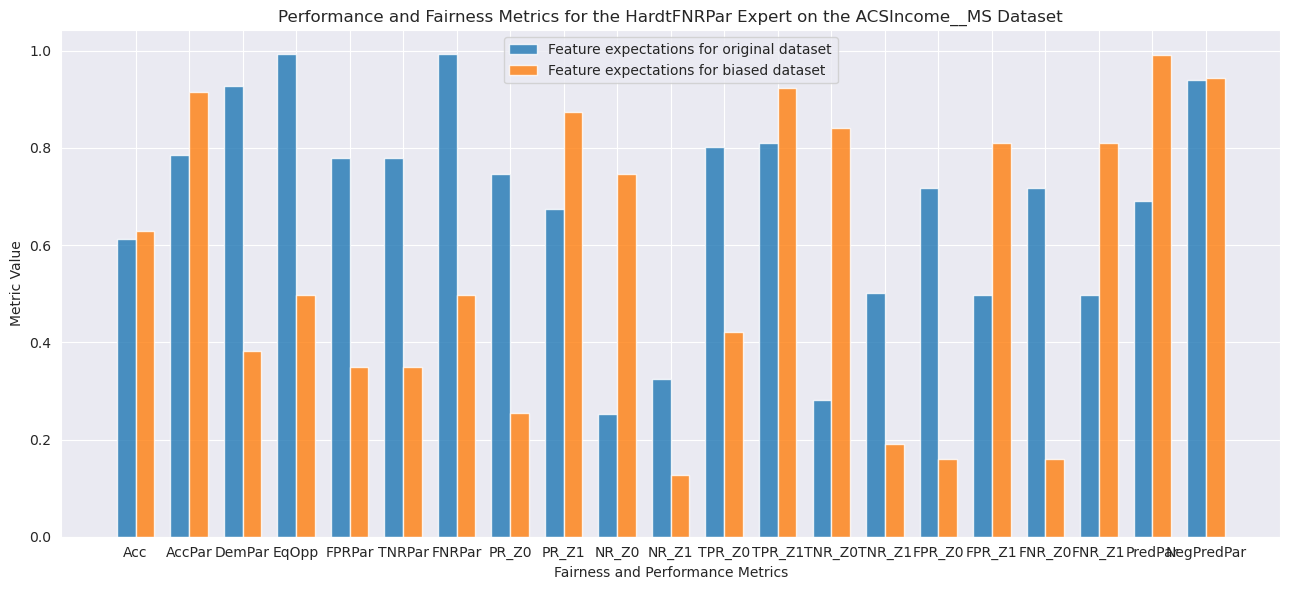

INFO:root:EXPERIMENT 7/7
INFO:root:For dataset: ACSIncome__MS and expert algo: HardtEqOdds:
INFO:root:Feature expectations with no bias: [[0.6196786  0.77441567 0.92528907 0.9830593  0.76656941 0.76656941 0.9830593  0.75213675 0.67742582 0.24786325 0.32257418 0.80711354 0.82405425 0.27709091 0.5105215  0.72290909 0.4894785  0.72290909 0.4894785  0.68913648 0.96371345]]
INFO:root:Feature expectations with redlining: [[0.62855935 0.89899479 0.372893   0.50743709 0.33812552 0.33812552 0.50743709 0.26407951 0.89118651 0.73592049 0.10881349 0.44689655 0.93945946 0.8314121  0.16953762 0.1685879  0.83046238 0.1685879  0.83046238 0.99335073 0.94791471]]


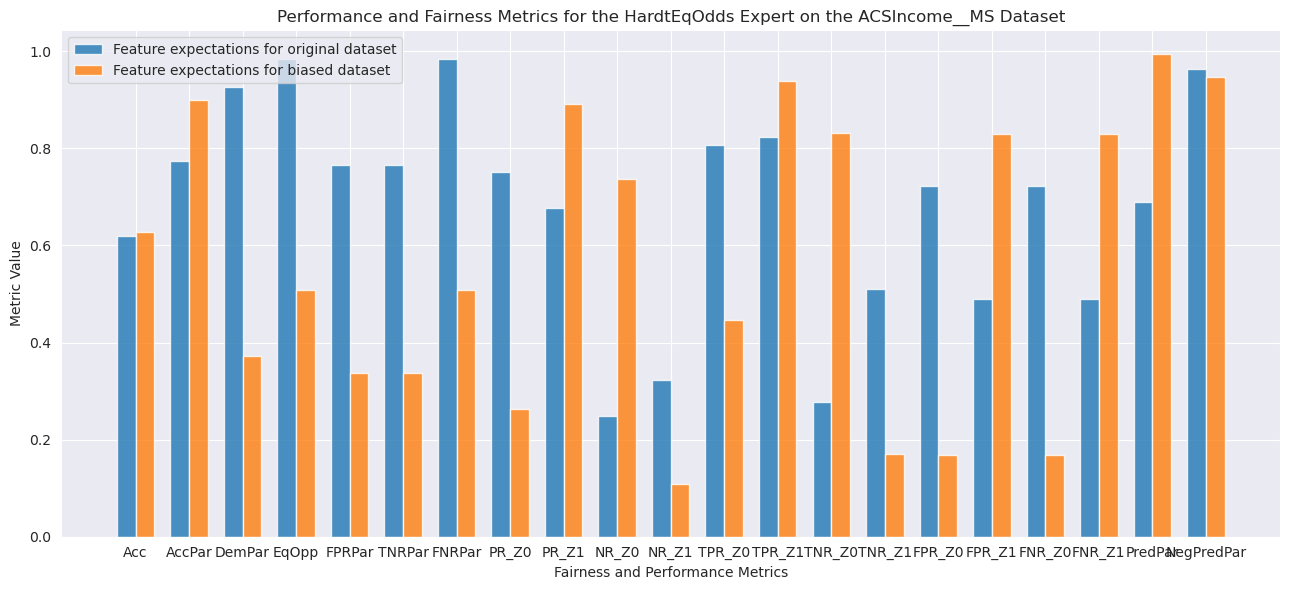

In [131]:
exp_info = dict(base_exp_info)
for exp_i, experiment in enumerate(experiments):
    # logging.info('\n\n')
    logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
    exp_info = dict(base_exp_info)
    
    for k in experiment:
        exp_info[k] = experiment[k]
        
    source_X, source_y, source_feature_types = generate_dataset(
        experiment['DATASET'],
        n_samples=exp_info['N_DATASET_SAMPLES'],
    )

    target_X, target_y, target_feature_types = generate_dataset(
        experiment['TARGET_DATASET'],
        n_samples=exp_info['N_DATASET_SAMPLES'],
    )

    for f in source_feature_types['categoric']:
        source_X[f] = source_X[f].astype(str)

    for f in target_feature_types['categoric']:
        target_X[f] = target_X[f].astype(str)
                   
    source_X_cols = (
        source_feature_types['boolean']
        + source_feature_types['categoric']
        + source_feature_types['continuous']
    )
    
    if exp_info['USE_HIDDEN_FEATURES_SOURCE']:
        source_X_cols += source_feature_types['hidden']
    _source_X = source_X[source_X_cols]
    
    
    target_X_cols = (
        target_feature_types['boolean']
        + target_feature_types['categoric']
        + target_feature_types['continuous']
    )
    if exp_info['USE_HIDDEN_FEATURES_TARGET']:
        target_X_cols += target_feature_types['hidden']
    _target_X = target_X[target_X_cols]
    
    logging.info(f"For dataset: {experiment['DATASET']} and expert algo: {experiment['EXPERT_ALGO']}:")
    
    unfairness_types = []
    uE_all = compute_feat_exp(ALL_FEAT_PERF_OBJECTIVE_NAMES, exp_info, source_X, source_y, source_feature_types, unfairness_types)
    unfairness_types = ["threshold_swapping"]
    # unfairness_types = ["redlining"]
    uE_all_redlining = compute_feat_exp(ALL_FEAT_PERF_OBJECTIVE_NAMES, exp_info, source_X, source_y, source_feature_types, unfairness_types)

    logging.info(f"Feature expectations with no bias: {uE_all}")
    logging.info(f"Feature expectations with redlining: {uE_all_redlining}")

    fig, ax = plt.subplots(figsize=(13, 6))
        
    # If no labels provided, use indices
    labels = ALL_FEAT_PERF_OBJECTIVE_NAMES
    
    # Set the positions for the bars
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    data1 = uE_all.ravel()
    data2 = uE_all_redlining.ravel()

    # Create the bars
    bars1 = ax.bar(x - width/2, data1, width, label='Feature expectations for original dataset', alpha=0.8)
    bars2 = ax.bar(x + width/2, data2, width, label='Feature expectations for biased dataset', alpha=0.8)
    
    # Add some text for labels, title and custom x-axis tick labels
    ax.set_xlabel("Fairness and Performance Metrics")
    ax.set_ylabel("Metric Value")
    ax.set_title(f"Performance and Fairness Metrics for the {experiment['EXPERT_ALGO']} Expert on the {experiment['DATASET']} Dataset")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    # Add value labels on top of each bar
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # add_value_labels(bars1)
    # add_value_labels(bars2)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()